## Lab 5 Report

Khoa Tran, AJ Chau, Justin Kim, and Praful Chopra

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.io import wavfile as wav
from scipy import signal as sig
from math import pi, inf
import simpleaudio as sa
import decimal
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, we demonstrated identifing the constituent frequencies of a signal by performing a Fourier Transform and examining the peaks in the frequency domain. We then utilize this analysis of constituent frequencies to create methods that classify touch-tone signals.
Finally, we decoded a phone number from its touch-tone signals using the methods we created.

## Assignment 1 --  Identifying Constituent Frequencies of a Signal

<IPython.core.display.Javascript object>


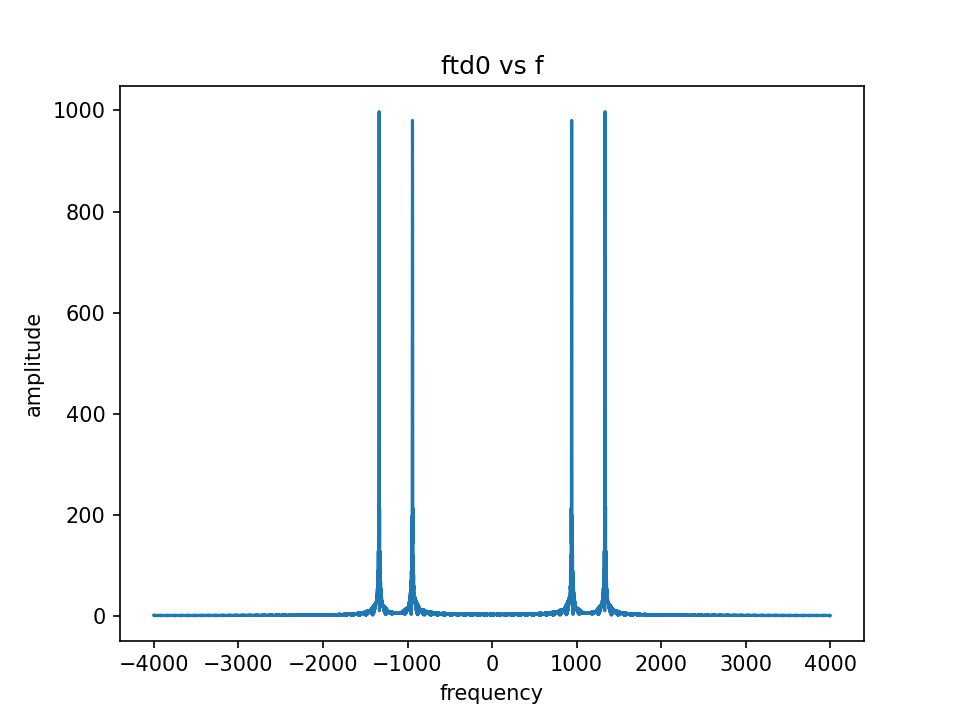

[ 941.40625 1335.9375 ]


<IPython.core.display.Javascript object>


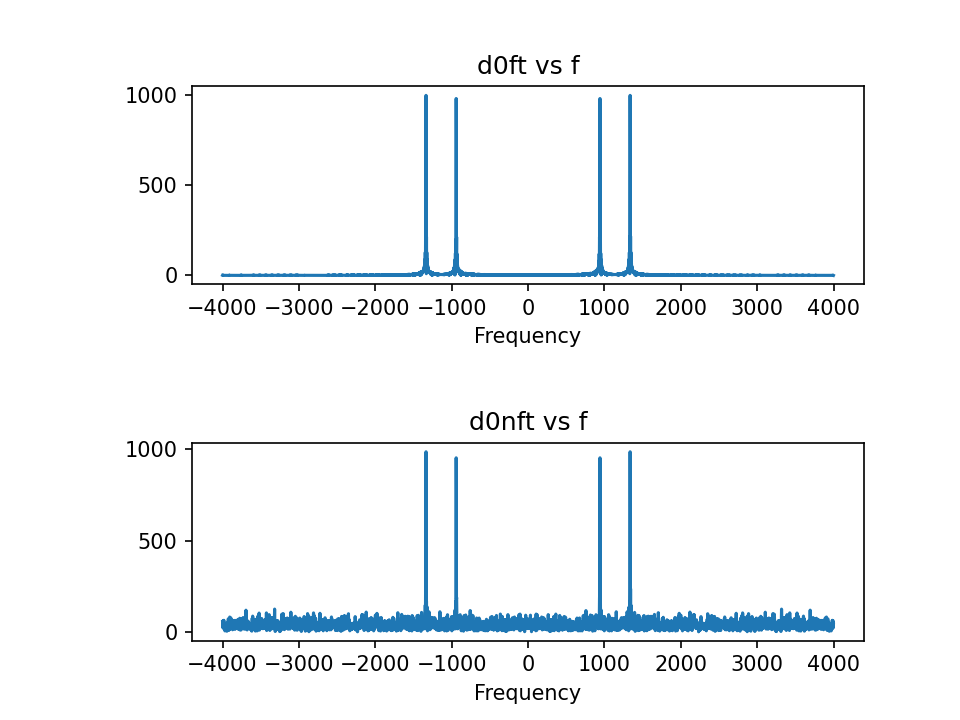

In [6]:
# Assignment 1 - Identifying Constituent Frequencies of a Signal

# Part A
fs = 8000
t = np.arange(0, 0.25, 1/fs)
d0 = np.sin(2*np.pi*941*t) + np.sin(2*np.pi*1336*t)

#Part B
delay = np.zeros(int(fs/2))
tone = np.concatenate([d0, delay, d0])
wav.write('tone.wav', fs, tone)

play_obj = sa.play_buffer(300*np.int16(tone),1,2,fs)
play_obj.wait_done()

#Part C
ftd0 = np.fft.fft(d0, 4096)
ftd0 = np.fft.fftshift(ftd0)
ftd0 = np.abs(ftd0)
f = np.arange(-0.5,0.5,1/4096)*fs

fig1 = plt.figure(1)
fig1.subplots_adjust(hspace = 0.5, wspace = 1.0)

plt.plot(f, ftd0)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('ftd0 vs f')

#Part D
ind = np.arange(len(ftd0))
threshold = ind[ftd0[ind] > 900]
arr = f[threshold]
print(np.array(arr[2:]))

#Part E
n = np.random.normal(0,1,len(d0))
d0n = d0 + n

ftd0n = np.fft.fft(d0n, 4096)
ftd0n = np.fft.fftshift(ftd0n)
ftd0n = np.abs(ftd0n)

plt.figure(2).subplots_adjust(hspace=0.8, left=0.2)

plt.subplot(211)
plt.plot(f, ftd0)
plt.xlabel('Frequency')
plt.title('d0ft vs f')

plt.subplot(212)
plt.plot(f, ftd0n)
plt.xlabel('Frequency')
plt.title('d0nft vs f')
plt.show()

# Discussion #1

The threshold value that we used was 900, but if we were to use a threshold of 100, it would not work because you get more values of the frequencies that exceed the mask without being the closest value to the actual true frequencies. 
The threshold would identify more frequencies with a threshold of 100 compared to 900,
The addition of noise completely changed the DFT plot due to resulting fact that it caused values of 941 to 1336 to change. These values were hovering consistent at 0, but the addition of noise caused these values to fluctuate, display the wrong values.
Lastly, the DFT plot would have a peak on the graph at 0 because adding 1 into the signal causes a new A coefficient at k=0 in the Fourier Series.

# Assignment 2: Classifying Touch-Tone Telephone Signals

In [7]:
def classify (x, fs):
    tone_freqs = np.array([[941,1336],[697,1209],[697,1336],[697,1477],[770,1209],[770,1336],[770,1477],[852,1209],[852,1336],[852,1477]])
    N = 4096
    f = np.arange(-0.5,0.5,1/N)*fs
    xfft_abs = np.fft.fft(x,N)
    xfft_abs = np.fft.fftshift(xfft_abs)
    xfft_abs = np.abs(xfft_abs)
    indices = np.arange(len(xfft_abs))
    index_tone = indices[xfft_abs[indices] > 900]
    freq_tone = f[index_tone]
    pos_freq = freq_tone[freq_tone > 0]
    min_e = inf
    
    min_e_tone = False
    for i in range(len(tone_freqs)):
        digit_error = (tone_freqs[i, 0] - pos_freq[0])**2 + (tone_freqs[i, 1] - pos_freq[1])**2   
        if(digit_error < min_e):
            min_e_tone = i
            min_e = digit_error 
    return min_e_tone

In [4]:
t = np.arange(0, 0.25, 1/fs)
d4 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1209*t)
d5 = np.sin(2*np.pi*770*t) + np.sin(2*np.pi*1336*t)
d8 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1336*t)
d9 = np.sin(2*np.pi*852*t) + np.sin(2*np.pi*1447*t)

print(classify(d4, fs))
print(classify(d5, fs))
print(classify(d8, fs))
print(classify(d9, fs))

4
5
8
9


# Discussion #2
If the signal had noise in assignment 1, we could set a higher threshold because a higher threshold would result in the least amount of frequency, reducing the noise effect.
Nyquist's sampling theorem states that a continuous time-signal can be reconstructed and sampled as long as the sample is at twice the speed of the highest frquency component. As a result, the xtreme ends is fs/2 due to Nyquist's theoreom of twice the frequency. So, diving the fs by 2 would satisfy the theorem.

# Assignment 3: Decoding a Phone Number from Touch-Tone Signals

In [9]:
phoneFile = open('phonenum.csv', 'rb')
data = np.loadtxt(phoneFile, delimiter=',')
phone_num = np.zeros(11) - 1
for number in range(len(phone_num)):
    start_index = int(number*fs/2)
    end_index = start_index + int(0.25*fs)
    target = data[start_index:end_index]
    phone_num[number] = classify(target, fs)
print (phone_num)

[1. 8. 0. 0. 7. 8. 6. 1. 0. 0. 0.]


# Discussion #3
1-800-786-1000: In-n-out